SelectMultiple(description='Log Files', options=('merge_PPO_1.log', 'merge_SAC_1.log', 'merge_SACsingle_2.log'…

SelectMultiple(description='Metrics', index=(2,), options=('collision_check', 'idle_check', 'mean_speed', 'nav…

IntSlider(value=1, description='Smooth Window', max=50, min=1)

Button(description='Refresh', style=ButtonStyle())

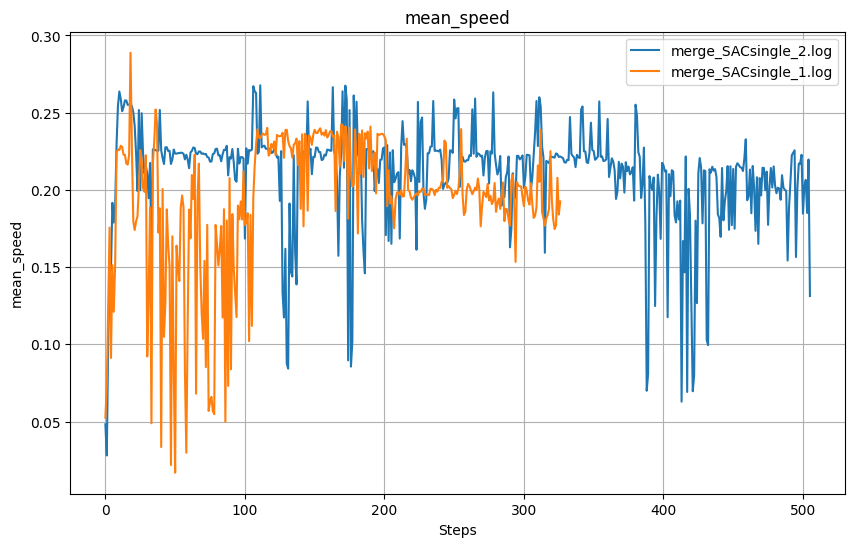

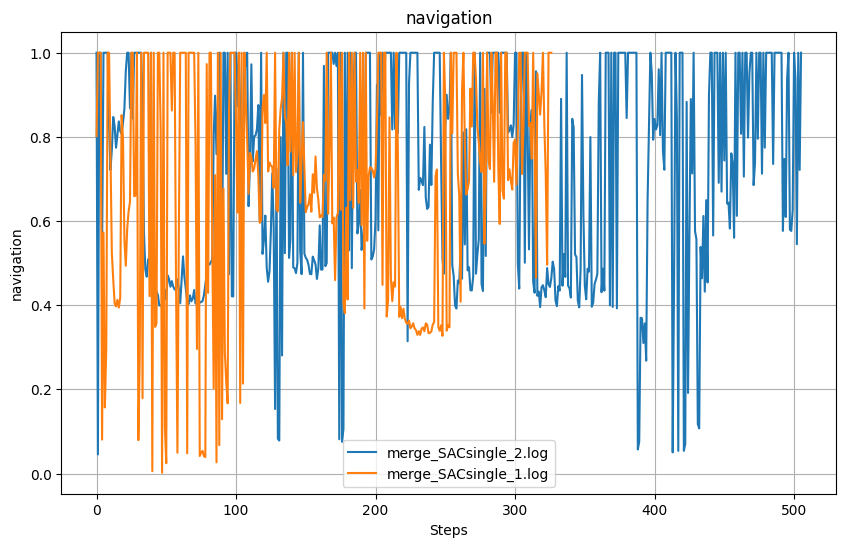

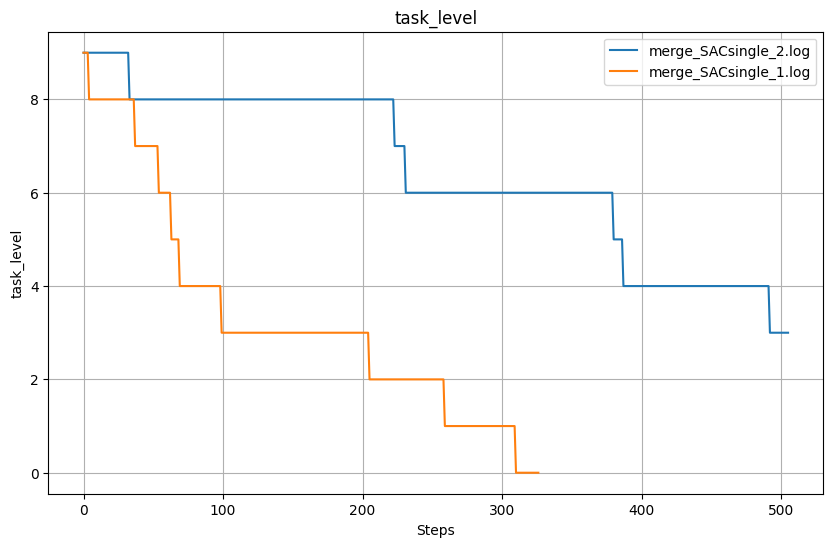

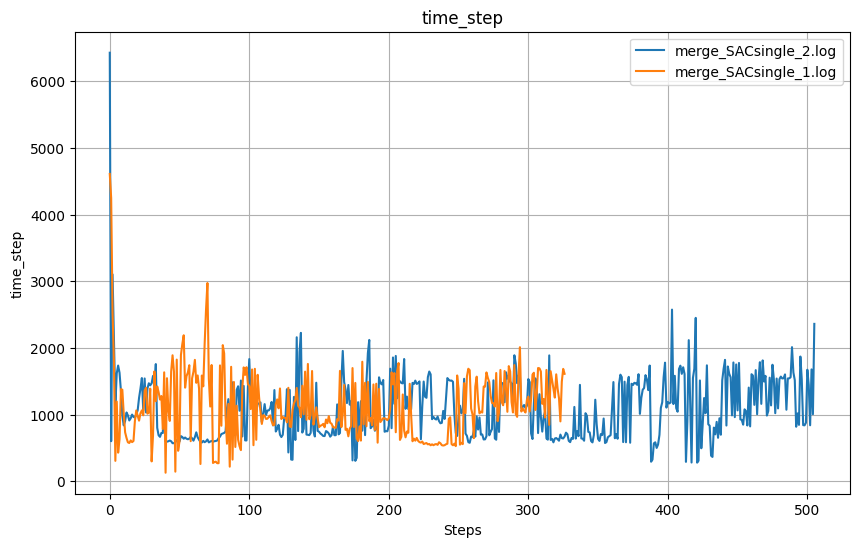

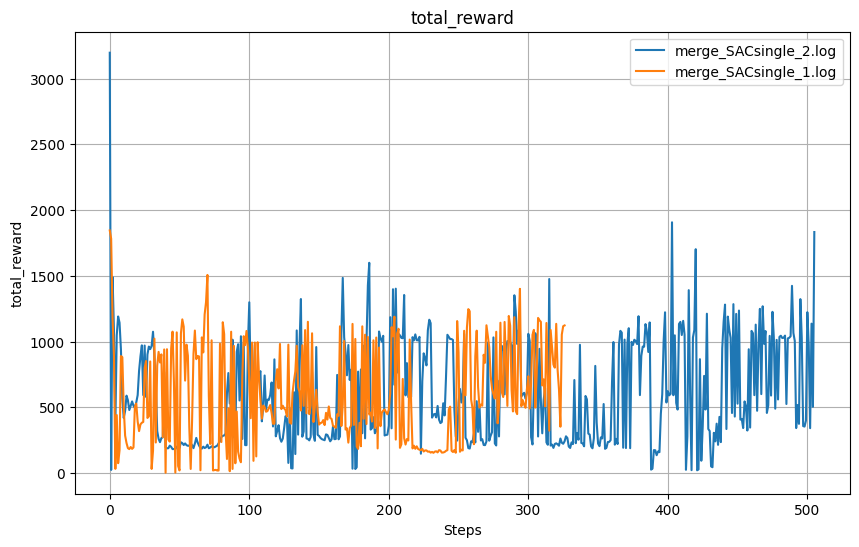

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

log_directory = "../log"

# 获得 log 目录中的所有文件
def get_log_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# 读取单个 log 文件，并将其转换为 pandas DataFrame
def read_log_file(filepath):
    with open(filepath, 'r') as file:
        records = [json.loads(line) for line in file]
    return pd.DataFrame(records)

# 获得数据中的所有指标
def get_all_metrics(log_files):
    all_metrics = set()
    for file in log_files:
        df = read_log_file(os.path.join(log_directory, file))
        all_metrics.update(df.columns)
    return sorted(all_metrics)

# 绘制曲线图
def plot_metrics(files, metrics, smooth_window):
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for file in files:
            df = read_log_file(os.path.join(log_directory, file))
            if metric in df.columns:
                steps = df.index
                values = df[metric]
                if smooth_window > 1:
                    smoothed_values = values.rolling(window=smooth_window, min_periods=1).mean()
                    plt.plot(steps, smoothed_values, alpha=0.5, label=f"{file} (Smoothed)")
                plt.plot(steps, values, label=file)
        plt.title(f"{metric}")
        plt.xlabel("Steps")
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.show()

# 创建下拉多选菜单和其他交互控件
log_files = get_log_files(log_directory)
all_metrics = get_all_metrics(log_files)
file_selector = widgets.SelectMultiple(options=log_files, description="Log Files", rows=10)
metrics_selector = widgets.SelectMultiple(options=all_metrics, value=["mean_speed"], description="Metrics", rows=10)
smooth_slider = widgets.IntSlider(value=1, min=1, max=50, step=1, description='Smooth Window')

# 创建“刷新”按钮
refresh_button = widgets.Button(description="Refresh")

def on_refresh_button_clicked(b):
    selected_files = file_selector.value
    selected_metrics = metrics_selector.value
    smooth_window = smooth_slider.value
    if selected_files and selected_metrics:
        plot_metrics(selected_files, selected_metrics, smooth_window)

refresh_button.on_click(on_refresh_button_clicked)

display(file_selector, metrics_selector, smooth_slider, refresh_button)
